In [1]:
import arviz as az
import numpy as np

In [2]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

The flight network topology is given by four airports A1, A2, A3, A4. Engine one flies between A1 and A2. Engine two flies between A3 and A4

In [3]:
# True parameter values
a, b, c, d, e, f, g, h = 0.7, 0.3, 0.4, 0.6, 0.1, 0.9, 0.9, 0.1
a1 = [a,b]
a2 = [c,d]
a3 = [e,f]
a4 = [g,h]

k1 = 0.5 * a + 0.5 * c
k2 = 0.5 * b + 0.5 * d
k3 = 0.5 * e + 0.5 * g
k4 = 0.5 * f + 0.5 * h

print(k1, k2, k3, k4)


0.55 0.44999999999999996 0.5 0.5


In [4]:
import pymc as pm
print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v5.15.1


In [5]:
basic_model = pm.Model()

with basic_model:
    # Priors for unknown model parameters
    alpha1 = pm.Uniform("alpha1", lower=[1,1], upper=[10,10])
    alpha2 = pm.Uniform("alpha2", lower=[1,1], upper=[10,10])
    alpha3 = pm.Uniform("alpha3", lower=[1,1], upper=[10,10])
    alpha4 = pm.Uniform("alpha4", lower=[1,1], upper=[10,10])
    a1 = pm.Dirichlet("a1", a=alpha1)
    a2 = pm.Dirichlet("a2", a=alpha2)
    a3 = pm.Dirichlet("a3", a=alpha3)
    a4 = pm.Dirichlet("a4", a=alpha4)
    sigma = 0.01

    # Expected value of outcome
    mu_e1_1 = 0.5 * a1[0] + 0.5 * a2[0]
    mu_e1_2 = 0.5 * a1[1] + 0.5 * a2[1]
    mu_e2_1 = 0.5 * a3[0] + 0.5 * a4[0]
    mu_e2_2 = 0.5 * a3[1] + 0.5 * a4[1]

      
    # Likelihood (sampling distribution) of observations
    e1_obs_1 = pm.Normal("e1_obs_1", mu=mu_e1_1, sigma=sigma, observed=k1)
    e1_obs_2 = pm.Normal("e1_obs_2", mu=mu_e1_2, sigma=sigma, observed=k2)
    e2_obs_1 = pm.Normal("e2_obs_1", mu=mu_e2_1, sigma=sigma, observed=k3)
    e2_obs_2 = pm.Normal("e2_obs_2", mu=mu_e2_2, sigma=sigma, observed=k4)

In [6]:
with basic_model:
    # draw 1000 posterior samples
    idata = pm.sample(1000, target_accept=0.85)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha1, alpha2, alpha3, alpha4, a1, a2, a3, a4]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 29 seconds.


In [7]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

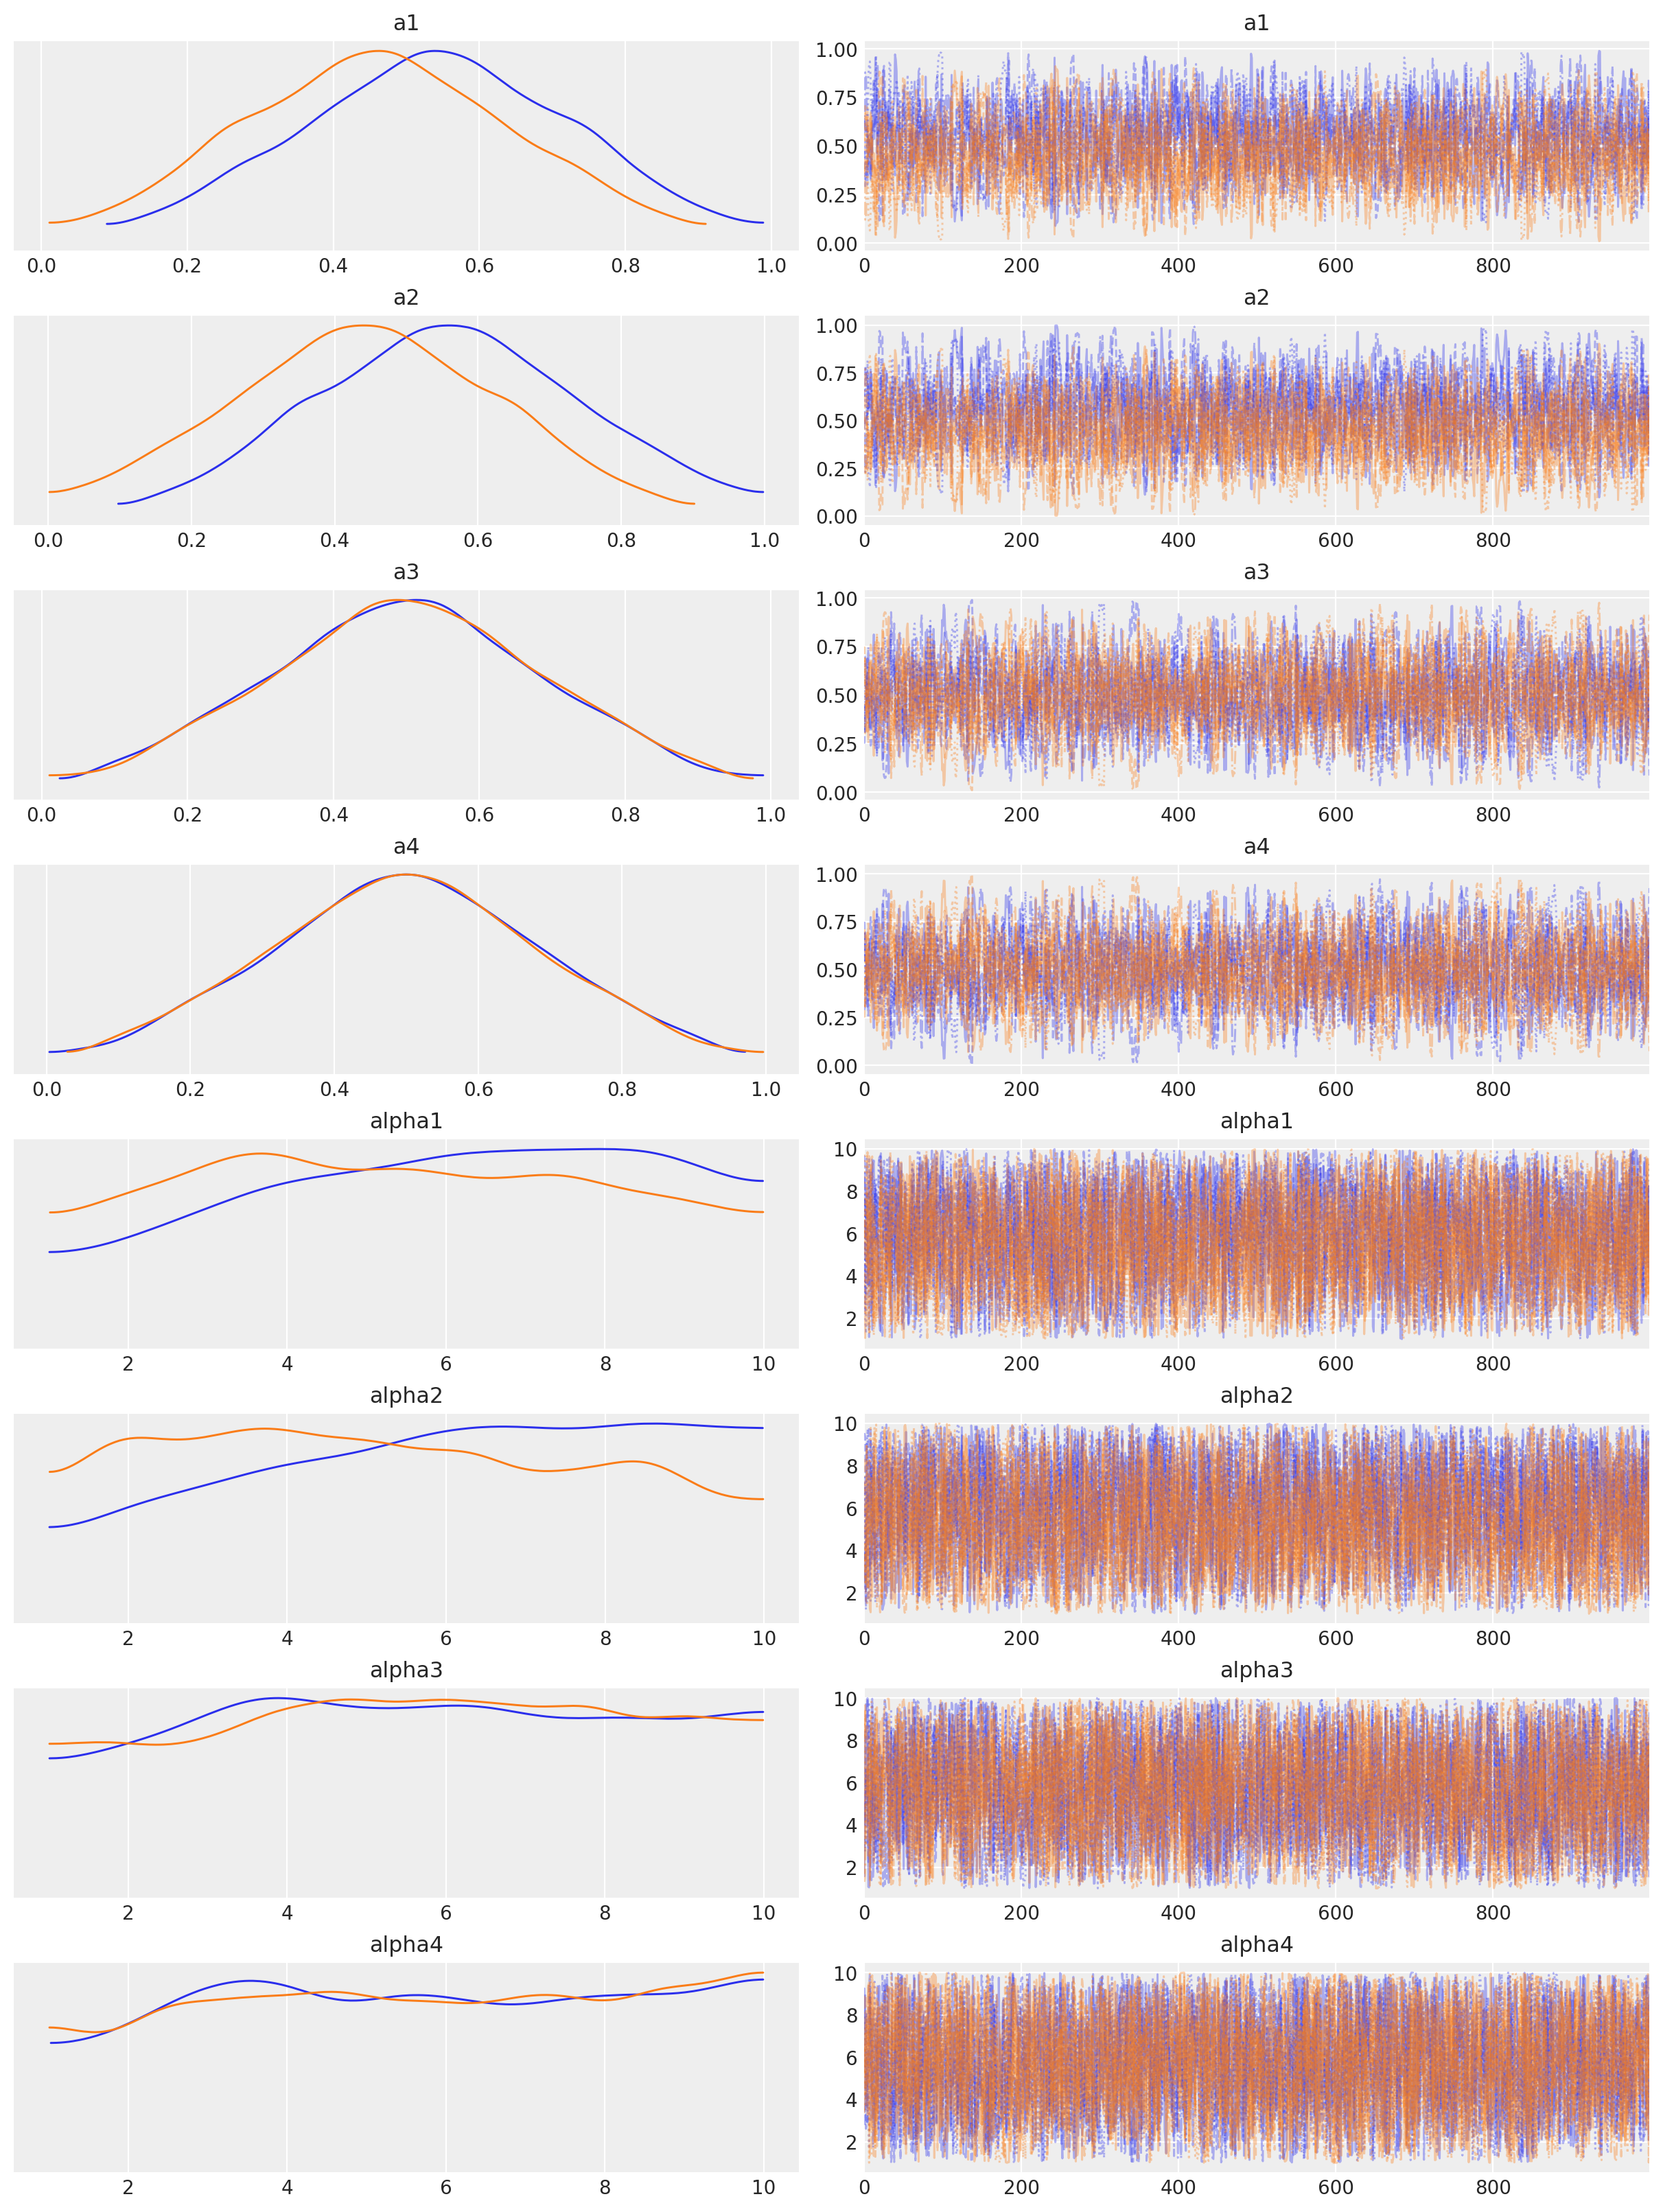

In [8]:
az.plot_trace(idata, combined=True);

In [9]:
az.summary(idata, round_to=2)

mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
a1[0]      0.54  0.18    0.20     0.89       0.01     0.00   1260.91   
a1[1]      0.46  0.18    0.11     0.80       0.01     0.00   1260.91   
a2[0]      0.56  0.18    0.22     0.90       0.01     0.00   1258.85   
a2[1]      0.44  0.18    0.10     0.78       0.01     0.00   1258.85   
a3[0]      0.50  0.19    0.15     0.86       0.01     0.00   1293.22   
a3[1]      0.50  0.19    0.14     0.85       0.01     0.00   1293.22   
a4[0]      0.50  0.19    0.13     0.84       0.01     0.00   1281.63   
a4[1]      0.50  0.19    0.16     0.87       0.01     0.00   1281.63   
alpha1[0]  5.94  2.40    1.96     9.97       0.05     0.03   2423.39   
alpha1[1]  5.43  2.47    1.45     9.71       0.05     0.04   2026.13   
alpha2[0]  6.01  2.44    1.95     9.98       0.05     0.03   2767.20   
alpha2[1]  5.27  2.50    1.30     9.52       0.05     0.04   2164.51   
alpha3[0]  5.61  2.51    1.70     9.97       0.05     0.04   2434.38   
alpha3[1]  5.64  2.51    1.62     9.97       0.05     0.04   2280.69   
alpha4[0]  5.65  2.55    1.70     9.96       0.05     0.04   2437.54   
alpha4[1]  5.67  2.58    1.65    10.00       0.05     0.04   2464.53   

           ess_tail  r_hat  
a1[0]       1300.23    1.0  
a1[1]       1300.23    1.0  
a2[0]       1269.56    1.0  
a2[1]       1269.56    1.0  
a3[0]       1332.72    1.0  
a3[1]       1332.72    1.0  
a4[0]       1362.24    1.0  
a4[1]       1362.24    1.0  
alpha1[0]   2207.85    1.0  
alpha1[1]   2128.09    1.0  
alpha2[0]   2271.43    1.0  
alpha2[1]   2245.43    1.0  
alpha3[0]   2276.06    1.0  
alpha3[1]   2162.31    1.0  
alpha4[0]   2061.70    1.0  
alpha4[1]   1966.80    1.0